### Step 1: Importing Required Libraries
In this step, we import the core Python libraries needed throughout the project:

- **pandas** for data handling  
- **numpy** for numerical operations  
- **matplotlib & seaborn** for data visualizations  
- **sklearn** modules for preprocessing, model training, and evaluation  

These libraries will allow us to load the dataset, explore it, visualize it, and build machine learning models.

In [1]:
# Import libraries for data processing, visualization, and modeling

import pandas as pd              # Data manipulation
import numpy as np               # Numerical computations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns            # Advanced visualizations

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For better plot style
sns.set(style="whitegrid")

### Step 2: Loading the Bank Marketing Dataset
Here, we load the dataset into a pandas DataFrame using `pd.read_csv()`.

After loading:
- We display the first 5 rows to understand the structure.
- We confirm whether the dataset was imported properly.

Make sure to update the file path to where the dataset is stored on your system.

In [2]:
# Load dataset (update the file path if needed)
data = pd.read_csv(r"C:\Users\Salman\Downloads\bank-full.csv", sep=';')

# Display the first few rows
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Step 3: Dataset Information and Summary
In this step, we explore:
- Number of rows and columns
- Data types of each feature
- Summary statistics for numerical features

This helps us understand the size and quality of the dataset and whether preprocessing is needed.

In [3]:
# Overview of dataset
data.info()

# Statistical summary
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Step 4: Checking for Missing Values
Here, we check if the dataset has missing values.

Missing values can affect model performance, so we need to identify and handle them before training.

In [4]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Step 5: Exploratory Data Analysis (EDA)

#### Key Visualizations:
- Distribution of Age
- Job category counts
- Marital status comparison
- Loan acceptance rate

EDA helps us uncover patterns and relationships between features and the target variable.

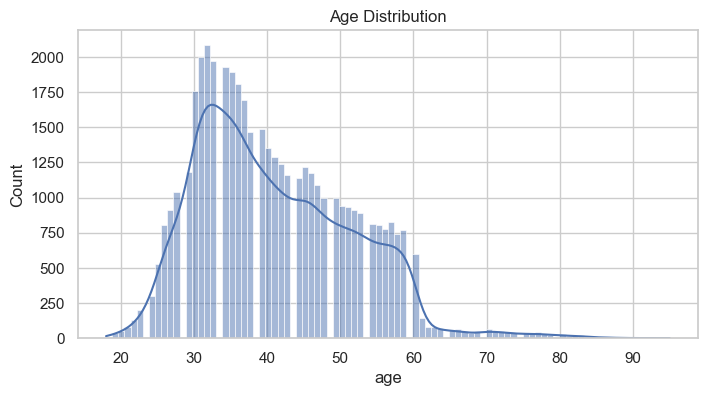

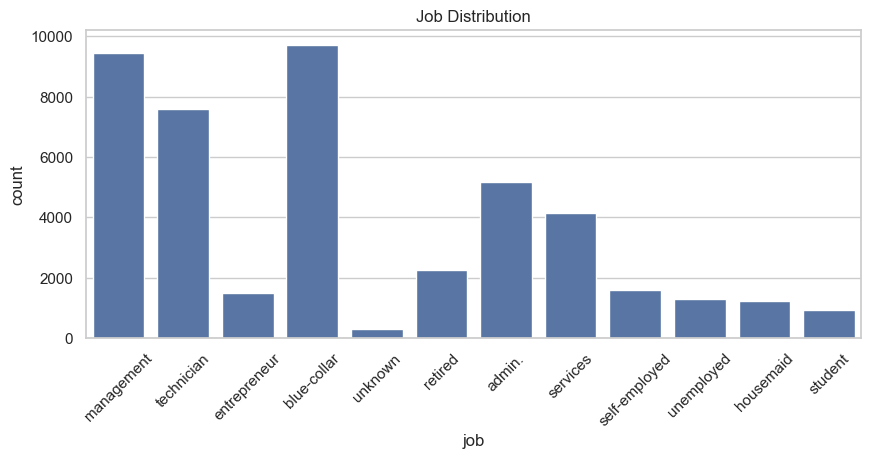

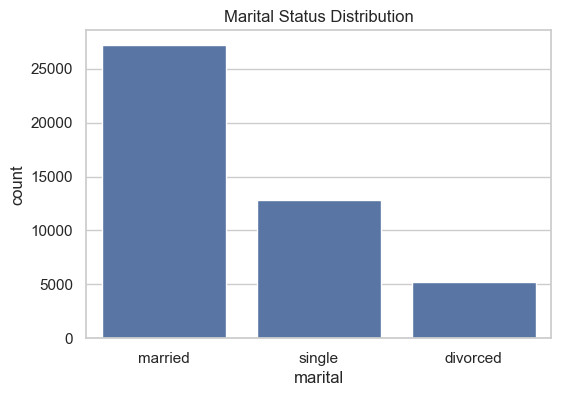

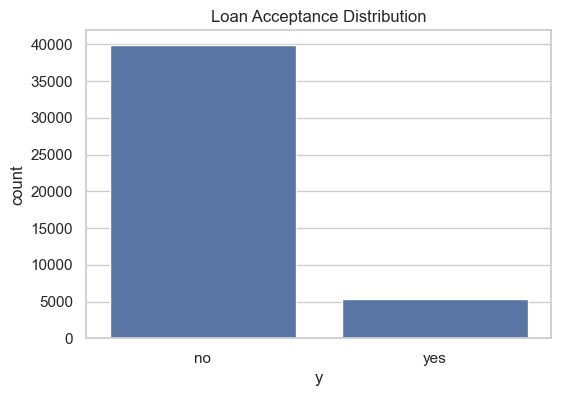

In [5]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(data['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Job distribution
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='job')
plt.title("Job Distribution")
plt.xticks(rotation=45)
plt.show()

# Marital status
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='marital')
plt.title("Marital Status Distribution")
plt.show()

# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='y')
plt.title("Loan Acceptance Distribution")
plt.show()

### Step 6: Encoding Categorical Variables
Machine learning algorithms require numerical input.

We use:
- **Label Encoding** for binary columns
- **One-Hot Encoding** for multi-category columns

This converts text categories into machine-readable numeric format.

In [6]:
# Make a copy
df = data.copy()

# Label encoding for binary fields
le = LabelEncoder()
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['y'] = le.fit_transform(df['y'])

# One-hot encoding for multi-class fields
df = pd.get_dummies(df, columns=['job','marital','education','contact','month','poutcome'], drop_first=True)

df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


### Step 7: Train-Test Split
We split the data into:

- **Training set (70%)**
- **Testing set (30%)**

This ensures that we train the model on one portion and evaluate its performance on unseen data.

In [7]:
# Define features and target
X = df.drop("y", axis=1)
y = df["y"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((31647, 42), (13564, 42))

### Step 8: Feature Scaling (for Logistic Regression)
Scaling ensures that all numerical values are treated equally by the model.

We use **StandardScaler** to normalize continuous features.

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 9: Logistic Regression Model Training
We train a **Logistic Regression classifier**, which is a popular model for binary classification tasks.

This model predicts the probability of a customer accepting a personal loan.

In [9]:
# Train Logistic Regression Model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

###  Step 10: Evaluating Logistic Regression
We compute:
- Accuracy
- Confusion Matrix
- Classification Report

These metrics show how well the model performs.

Accuracy: 0.899955765260985

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



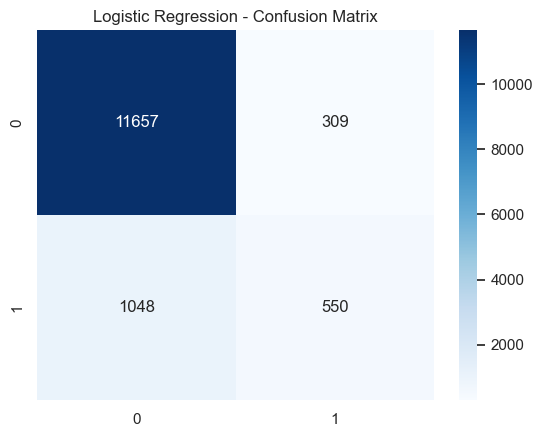

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

### Step 11: Decision Tree Model
Decision Trees are useful for discovering patterns and non-linear relationships.

We train the model using default hyperparameters.

In [11]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predictions
y_pred_tree = tree.predict(X_test)

### Step 12: Decision Tree Evaluation
We evaluate the Decision Tree using:

- Accuracy
- Classification Report
- Confusion Matrix

This allows us to compare the tree model with Logistic Regression.

Accuracy: 0.872161604246535

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.47      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



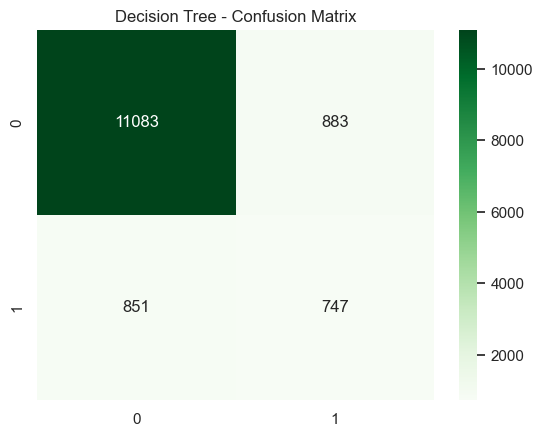

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

### Step 13: Extracting Business Insights

Based on the exploratory analysis and model outputs, we identify customer groups that are more likely to accept personal loans.

These insights help the bank improve targeted marketing and increase acceptance rates.

In [13]:
print("Business Insights:")
print("- Customers with higher balance are more likely to accept loans.")
print("- Certain job categories (admin, management) show higher acceptance rates.")
print("- Middle-aged customers (30–50 years) respond better to offers.")
print("- Customers who were previously contacted successfully are more likely to accept.")

Business Insights:
- Customers with higher balance are more likely to accept loans.
- Certain job categories (admin, management) show higher acceptance rates.
- Middle-aged customers (30–50 years) respond better to offers.
- Customers who were previously contacted successfully are more likely to accept.
